나랑 닮은 연예인을 찾아보기 프로젝트 
======

얼굴의 임베딩 벡터로 나와 가장 가까운(닮은 꼴인) 연예인을 찾아냅니다.


~21.10.14~

## 1. 사진 모으기

In [1]:
import os

dir_path = os.getenv('HOME')+'/aiffel/Exploration/E5/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(len(file_list))) # 이미지 개수 출력 

file_list: 300


- 내사진 1장을 제외한 299장의 연예인 사진 사용 

## 2. 얼굴 영역 자르기

임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다.     

- 사용한 함수     
    def get_cropped_face(image_file) : 이미지 파일에서 얼굴 영역을 가져오는 함수    
    
자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두고 다양한 재미있는 시각화를 시도해 봅니다. 

In [2]:
# 이미지 파일 경로를 파라미터로 넘기면 얼굴 영역만 잘라서 주는 함수
import face_recognition

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

(-0.5, 371.5, 384.5, -0.5)

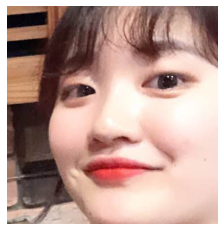

In [3]:
# 함수가 잘 만들어 졌는지 확인
import matplotlib.pyplot as plt
%matplotlib inline

image_path = os.getenv('HOME')+'/aiffel/Exploration/E5/face_embedding/celebrity/sm.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)
plt.axis("off")

## 3. 얼굴 영역의 임베딩 추출하기

얼굴 영역으로 잘린 이미지들을 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅니다.     
다른 사람의 임베딩은 구분할 수 있게 따로 저장합니다.     
    
- 사용한 함수     
    def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수      
    def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [4]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face): # 얼굴 영역으로 자른 이미지 넣어주기
    return face_recognition.face_encodings(face)

In [5]:
# sm.jpg에 포함된 얼굴 영역의 임베딩 벡터를 구해 보기
embedding = get_face_embedding(cropped_face)  
embedding

[array([-0.12542213,  0.0484248 ,  0.00746862, -0.09901188, -0.17228355,
        -0.01761246, -0.07854995, -0.05478811,  0.10571841, -0.14870661,
         0.10697129, -0.12081536, -0.25370649,  0.00225151, -0.05715076,
         0.24142714, -0.15209492, -0.16133381, -0.08144044, -0.00794527,
         0.0287274 ,  0.03575012, -0.01021995,  0.08596364, -0.06460695,
        -0.32513997, -0.04507585, -0.03140406, -0.10666753, -0.03165743,
        -0.04228306,  0.07288317, -0.15819177, -0.02647314,  0.05561749,
         0.13253781, -0.04121879, -0.09923676,  0.16721284,  0.00633361,
        -0.3044633 ,  0.02367904,  0.10004573,  0.25068668,  0.14366531,
        -0.0266549 , -0.02364539, -0.09992664,  0.13134067, -0.23567709,
         0.01318198,  0.16485597,  0.0371157 ,  0.02344784,  0.03640464,
        -0.10980594,  0.04483087,  0.21358234, -0.09197464, -0.0290703 ,
         0.10417078, -0.06438874, -0.01006412, -0.17921297,  0.24414124,
         0.12064356, -0.13045819, -0.18547745,  0.1

- Face_recognition 패키지에서 제공하는 얼굴 임베딩 벡터의 차원수는 128차원으로 FaceNet 논문에서 언급한 얼굴 임베딩 벡터의 차원수와 같다. 

In [6]:
# images 디렉토리 안에 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면 len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [7]:
# embedding_dict 만들고 확인
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['sm']

array([-0.12542213,  0.0484248 ,  0.00746862, -0.09901188, -0.17228355,
       -0.01761246, -0.07854995, -0.05478811,  0.10571841, -0.14870661,
        0.10697129, -0.12081536, -0.25370649,  0.00225151, -0.05715076,
        0.24142714, -0.15209492, -0.16133381, -0.08144044, -0.00794527,
        0.0287274 ,  0.03575012, -0.01021995,  0.08596364, -0.06460695,
       -0.32513997, -0.04507585, -0.03140406, -0.10666753, -0.03165743,
       -0.04228306,  0.07288317, -0.15819177, -0.02647314,  0.05561749,
        0.13253781, -0.04121879, -0.09923676,  0.16721284,  0.00633361,
       -0.3044633 ,  0.02367904,  0.10004573,  0.25068668,  0.14366531,
       -0.0266549 , -0.02364539, -0.09992664,  0.13134067, -0.23567709,
        0.01318198,  0.16485597,  0.0371157 ,  0.02344784,  0.03640464,
       -0.10980594,  0.04483087,  0.21358234, -0.09197464, -0.0290703 ,
        0.10417078, -0.06438874, -0.01006412, -0.17921297,  0.24414124,
        0.12064356, -0.13045819, -0.18547745,  0.10193025, -0.09

- 위에서 구한 임베딩 벡터와 같이 잘 만들어 진 것을 확인 할 수 있다.

## 4. 모은 연예인들과 비교하기

모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅니다.    

임베딩 벡터들 간의 거리는 np.linalg.norm를 활용하면 쉽게 구할 수 있습니다.
     

- 사용한 함수     
    def get_distance(name1, name2) : 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수      
    def get_sort_key_func(name1) : get_distance 함수를 쉽게 사용하도록 하는 함수    
    def get_nearest_face(name, top) : top(순위)별로 가장 닮은 얼굴 찾는 함수 


In [8]:
# 인자로 파일명의 사람 이름 2개를 받아, 두 사람의 얼굴 임베딩 사이의 거리(L2 distance)를 구하는 함수
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# get_distance 실행 확인
get_distance('sm', 'b1a4진영')

0.5135498950942674

- https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html    
    ord=1 : L1 distance    
    ord=2 : L2 distance
- 두 얼굴 사이 임베딩 거리를 구하는 get_distance 함수가 잘 작동됨을 볼 수 있다.  

In [9]:
# name1과 name2의 거리를 비교하는 함수를 생성, name1은 미리 지정, name2는 호출시에 인자로 받음
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 예시
# 생성된 함수 sort_key_func는 sort_key_func(name2) 라고 호출할 때 sm와 name2 사이의 임베딩 벡터 거리 계산
sort_key_func = get_sort_key_func('sm')

In [10]:
# 입력받은 임의의 이름에 대해 다른 이미지의 임베딩 거리를 정렬해서 적절히 출력
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('[ {}순위 ] 이름 : {} / 임베딩 거리 : {}'.format(i, sorted_faces[i][0], round(sort_key_func(sorted_faces[i][0]), 5)))
    
    return sorted_faces

- 모든 이미지 파일에 대한 얼굴 임베딩 딕셔너리를 오름차순 정렬하되, 정렬 기준을 바로 sm와의 임베딩 벡터 거리 함수로 할 것입니다. 이때 lambda 함수가 정렬 key로 활용됩니다.

In [11]:
# 나와 가장 닮은 사람은 ?
nearest_face = get_nearest_face('sm')

[ 1순위 ] 이름 : 강민경 / 임베딩 거리 : 0.39128
[ 2순위 ] 이름 : 비니 / 임베딩 거리 : 0.39936
[ 3순위 ] 이름 : 김고은 / 임베딩 거리 : 0.40416
[ 4순위 ] 이름 : 김다미 / 임베딩 거리 : 0.41865
[ 5순위 ] 이름 : 레드벨벳웬디 / 임베딩 거리 : 0.41872


- top = 5 로하여 거리가 가까운 순으로 5명까지 출력합니다. 

## 5. 시각화 하기

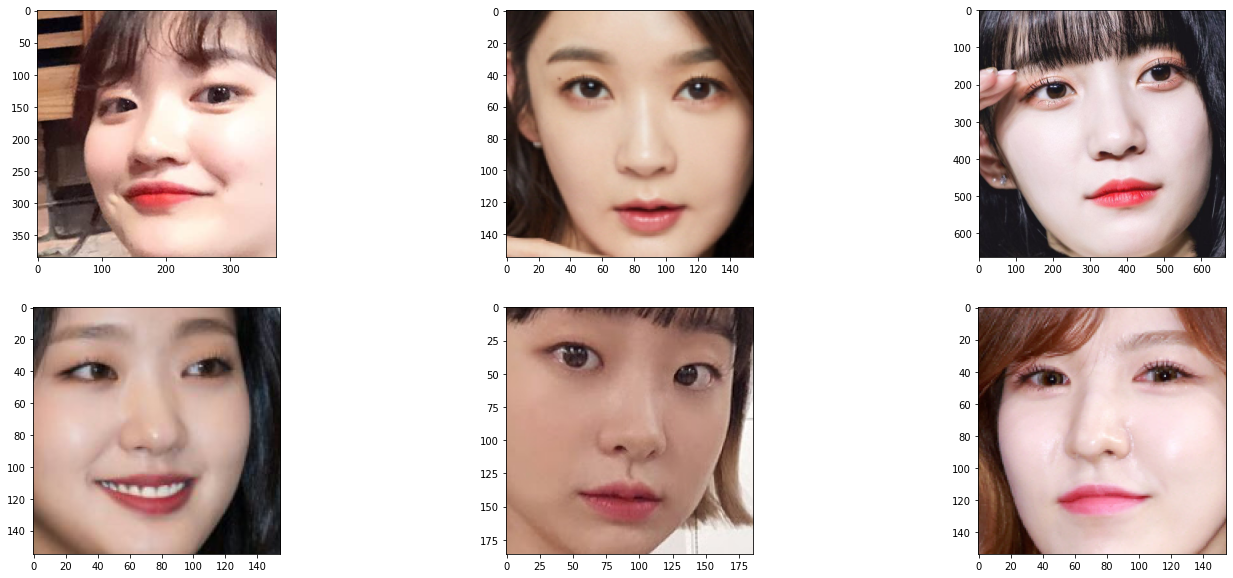

In [12]:
import matplotlib.image as img

file_list = os.listdir(dir_path)

# figsize 세팅 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    for file in file_list:
        if nearest_face[i][0] == os.path.splitext(file)[0] :
            img_dir = os.path.splitext(file)[0]+os.path.splitext(file)[1]
    
    cropped_face = get_cropped_face(dir_path+'/'+img_dir)    
    #image = img.imread(dir_path+'/'+img_dir)
    ax.imshow(cropped_face)

plt.show()
fig.tight_layout()

- matplotlib를 사용하여 내 얼굴과 top5 연예인 얼굴을 출력해 보았다.

### tkinter 사용해보기

In [13]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [14]:
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

In [ ]:
from tkinter import *

window = Tk()
window.title("나와 닮은 연예인 찾기")


#img = []
#for i in range(6):
#    img.append("" + nearest_face[i][0])
    
window.mainloop()

- tkinter를 사용하여 시각화 해보려 했으나 클라우드 환경에서는 실행되지 않는것 같아 못하였습니다. 

### Flask 사용해보기

In [1]:
!pip install Flask

In [2]:
!pip install flask-ngrok

In [4]:
import os
from flask import Flask
from flask_ngrok import run_with_ngrok

file_path = os.getenv('HOME')+'/aiffel/Exploration/E5/face_embedding/celebrity/sm.jpg'

app = Flask(__name__)
run_with_ngrok(app)
@app.route('/')

def home():
     return '''<h1>나와 닮은 연예인 찾기</h1>'''

if __name__ == '__main__':
     app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://a4f7-34-234-211-16.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [14/Oct/2021 08:27:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Oct/2021 08:27:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Oct/2021 08:27:47] "GET /favicon.ico HTTP/1.1" 404 -


- Flask를 사용하여 시각화 해보려 했으나 이미지 출력이 잘 되지 않았습니다. 

## 회고

- 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.    
    닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트를 정렬하여 출력하였다. 

- 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.    
    299장의 이미지를 사용하여 내 이미지 파일과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.

- 다양하고 재미있는 결과 시각화를 시도하였다.    
    matplotlib를 사용하여 얼굴을 나타내었다.     
    tkinter와 flask를 사용하여 시각화 하려 했으나 잘 되지 않아 해당 내용을 좀 더 공부해야 할 것 같다. 